# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

## Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

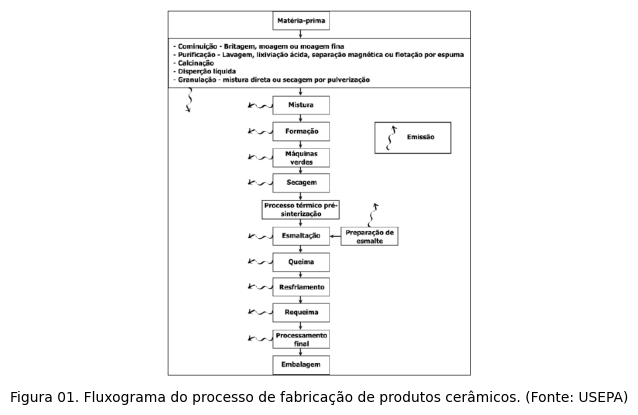

In [51]:
import matplotlib.pyplot as plt

# Caminho para a imagem no seu computador
caminho_imagem = 'C:\\Users\\mayar\\Downloads\\Captura de tela 2024-05-03 221653.png'  # Substitua pelo caminho correto da sua imagem

# Carregar a imagem usando plt.imread()
imagem = plt.imread(caminho_imagem)

# Exibir a imagem usando plt.imshow()
plt.imshow(imagem)
plt.axis('off')  # Oculta os eixos

# Adicionar legenda
plt.text(0.5, -0.05, 'Figura 01. Fluxograma do processo de fabricação de produtos cerâmicos. (Fonte: USEPA)',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

#MATHUES: DA UMA LIDA DE FORMA GERAL E VÊ SE ENTENDES O PROCESSOS E OS VALORES QUE USEI, CONFERE SE ESTÃO CERTO TAMBÉM. POSSO TER ERRADO ALGO 

## Planilha de fatores de emissões compilada

In [2]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)


,Source,PM,SO2,NOX
0,Comminution,0.060000,nan,nan
1,Dryer,1.150000,nan,nan
2,Cooler,0.055000,nan,nan
3,Granulation,0.095000,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000
5,Refiring natural gas,0.033500,nan,nan
6,Ceramic glaze spray booth,0.900000,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimentos por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano 

ou então, 

11955,09 toneladas/mês. Também assumindo a premissa de uma escala produtiva uniforma ao longo do ano.

## Plotando os fatores de emissão

364176.02773499995
1
2
3


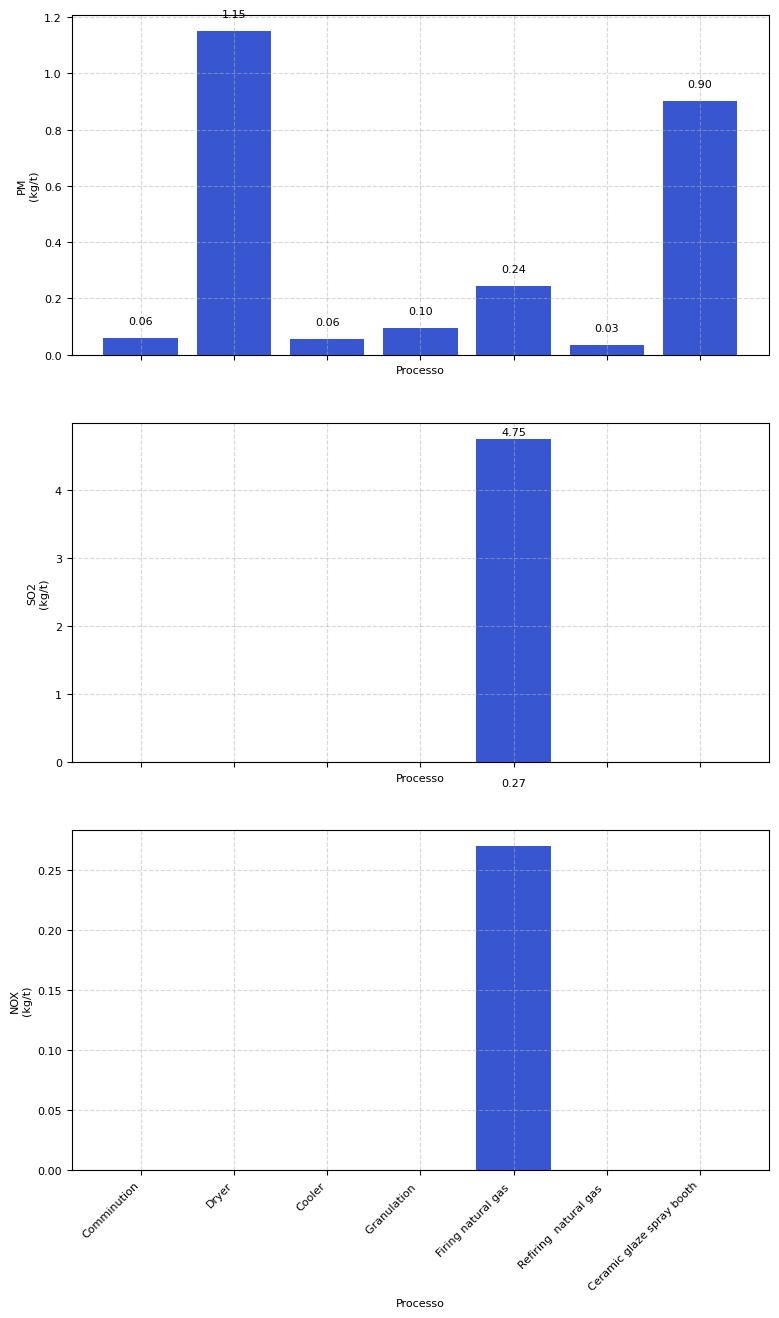

In [3]:
import matplotlib.pyplot as plt
import numpy as np

atv = 143461.11  # A unidade descrita aqui é toneladas. Os processos para determinar este valor estão descritos anteriormente
emis = fe['PM'] * atv

cwd = os.getcwd()

# Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=['#3856CF'])
    ax[ii - 1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n(kg/t)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii - 1].tick_params(axis='x', labelsize=8)
    ax[ii - 1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii - 1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii - 1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

    # Adicionando linhas de grade
    ax[ii - 1].grid(True, linestyle='--', alpha=0.5)

    # Adicionando rótulos nos topos das barras
    for x, y in zip(fe['Source'], fe.iloc[:, ii]):
        if np.isfinite(y):  # Verifica se o valor de y é finito
            ax[ii - 1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)

# Salva a figura na pasta figures
fig.savefig(cwd + '\\figures\\barplot_fatorEmiss.png')

plt.show()


### Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos

Não é possível avaliar de forma precisa qual o processo do empreendimento que produz mais poluentes devido a ausência de valores de fatores de emissão para todos os processos mencionados, fazendo com que não seja possível avaliá-los de forma igual. Entretanto, se for levado em consideração apenas a emissão de partículado, o processo que possui a maior emissão ao longo de um ano é a o secador ou "dryer".

# Criando taxa de atividade aleatória com sazonalidade

Dado que só possuímos um dado anual, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 toneladas por dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, consideramos dois cenários. No primeiro cenário, a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.
XXXXXXXXX EXPLICAR acho que tem que dividir os valores anterioires por por 12 e premissas adotadas para atividade máxima e min
### Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

Dado que só possuímos um dado anual, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 toneladas por dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, consideramos dois cenários. No primeiro cenário, a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia

### Série temporal das emissões mensais do empreendimento

      Atividade
0    393.008542
1    392.833815
2    393.244435
3    392.624362
4    392.654606
..          ...
995  393.239292
996  392.818946
997  393.004472
998  392.588504
999  393.334754

[1000 rows x 1 columns]


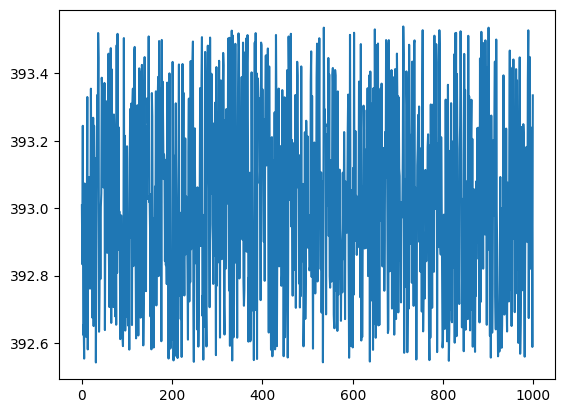

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 393.54
atvMin = 392.54
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Salvando o DataFrame como arquivo .csv
df.to_csv(output_path, index=False)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [5]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month


#criar um array de 1 a 365 e colocar igual a df['Dia']
df['Dia do Ano'] = df['Data'].dt.dayofyear  

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  393.097266
1   2024-01-02    1           2  392.606281
2   2024-01-03    1           3  393.039129
3   2024-01-04    1           4  392.706136
4   2024-01-05    1           5  392.975208
..         ...  ...         ...         ...
361 2024-12-27   12         362  393.475446
362 2024-12-28   12         363  392.881268
363 2024-12-29   12         364  392.975355
364 2024-12-30   12         365  392.542802
365 2024-12-31   12         366  393.002183

[366 rows x 4 columns]


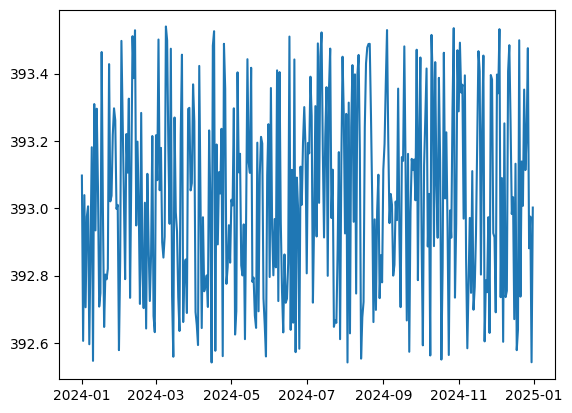

In [6]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ0.csv")


#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(datas, atv)
plt.show()


0      1.999852
1      1.999407
2      1.998667
3      1.997630
4      1.996298
         ...   
361    1.998667
362    1.999407
363    1.999852
364    2.000000
365    1.999852
Name: Dia do Ano, Length: 366, dtype: float64


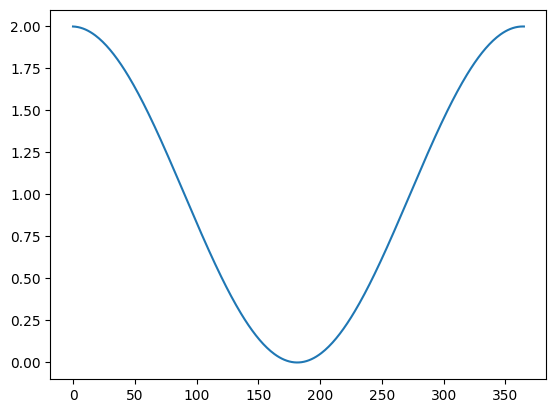

In [7]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 #taxa de revestimento produzida diariamente 
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
df.to_csv 
print(sazonalidade)

df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ.csv")

In [8]:
#Variablidade com Monte Carlo
import numpy as np

# Gerando variabilidade usando o método Monte Carlo
df['variabilidade'] = np.random.rand(len(df)) * (atvMax - atvMin) + atvMin

# Definindo a produção diária aplicando variabilidade
df['producao_diaria'] =  df['variabilidade'] + df['sazonalidade'] 


print (df)


          Data  Mes  Dia do Ano   atividade  sazonalidade  variabilidade  \
0   2024-01-01    1           1  393.097266      1.999852     392.614672   
1   2024-01-02    1           2  392.606281      1.999407     393.067723   
2   2024-01-03    1           3  393.039129      1.998667     392.709927   
3   2024-01-04    1           4  392.706136      1.997630     393.477518   
4   2024-01-05    1           5  392.975208      1.996298     393.448203   
..         ...  ...         ...         ...           ...            ...   
361 2024-12-27   12         362  393.475446      1.998667     393.406168   
362 2024-12-28   12         363  392.881268      1.999407     392.811642   
363 2024-12-29   12         364  392.975355      1.999852     392.897179   
364 2024-12-30   12         365  392.542802      2.000000     393.206643   
365 2024-12-31   12         366  393.002183      1.999852     393.368663   

     producao_diaria  
0         394.614524  
1         395.067130  
2         394.7085

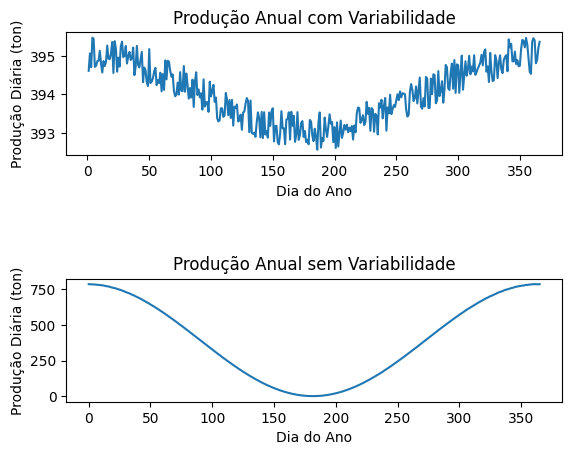

In [9]:
# Vamos usar essa coluna para o eixo x no gráfico
# Substitua 'Dia do Ano' pelo nome da coluna correspondente em seu DataFrame, se necessário
fig, ax = plt.subplots(2)

# Plotagem do primeiro gráfico
ax[0].plot(df['Dia do Ano'], df['producao_diaria'])
ax[0].set_title('Produção Anual com Variabilidade')
ax[0].set_xlabel('Dia do Ano')
ax[0].set_ylabel('Produção Diária (ton)')

# Plotagem do segundo gráfico
ax[1].plot(df['atividade']*df['sazonalidade'])
ax[1].set_title('Produção Anual sem Variabilidade')
ax[1].set_xlabel('Dia do Ano')
ax[1].set_ylabel('Produção Diária (ton)')

# Adicionando espaço entre os gráficos
plt.subplots_adjust(hspace=1)

plt.show()


### Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta. 

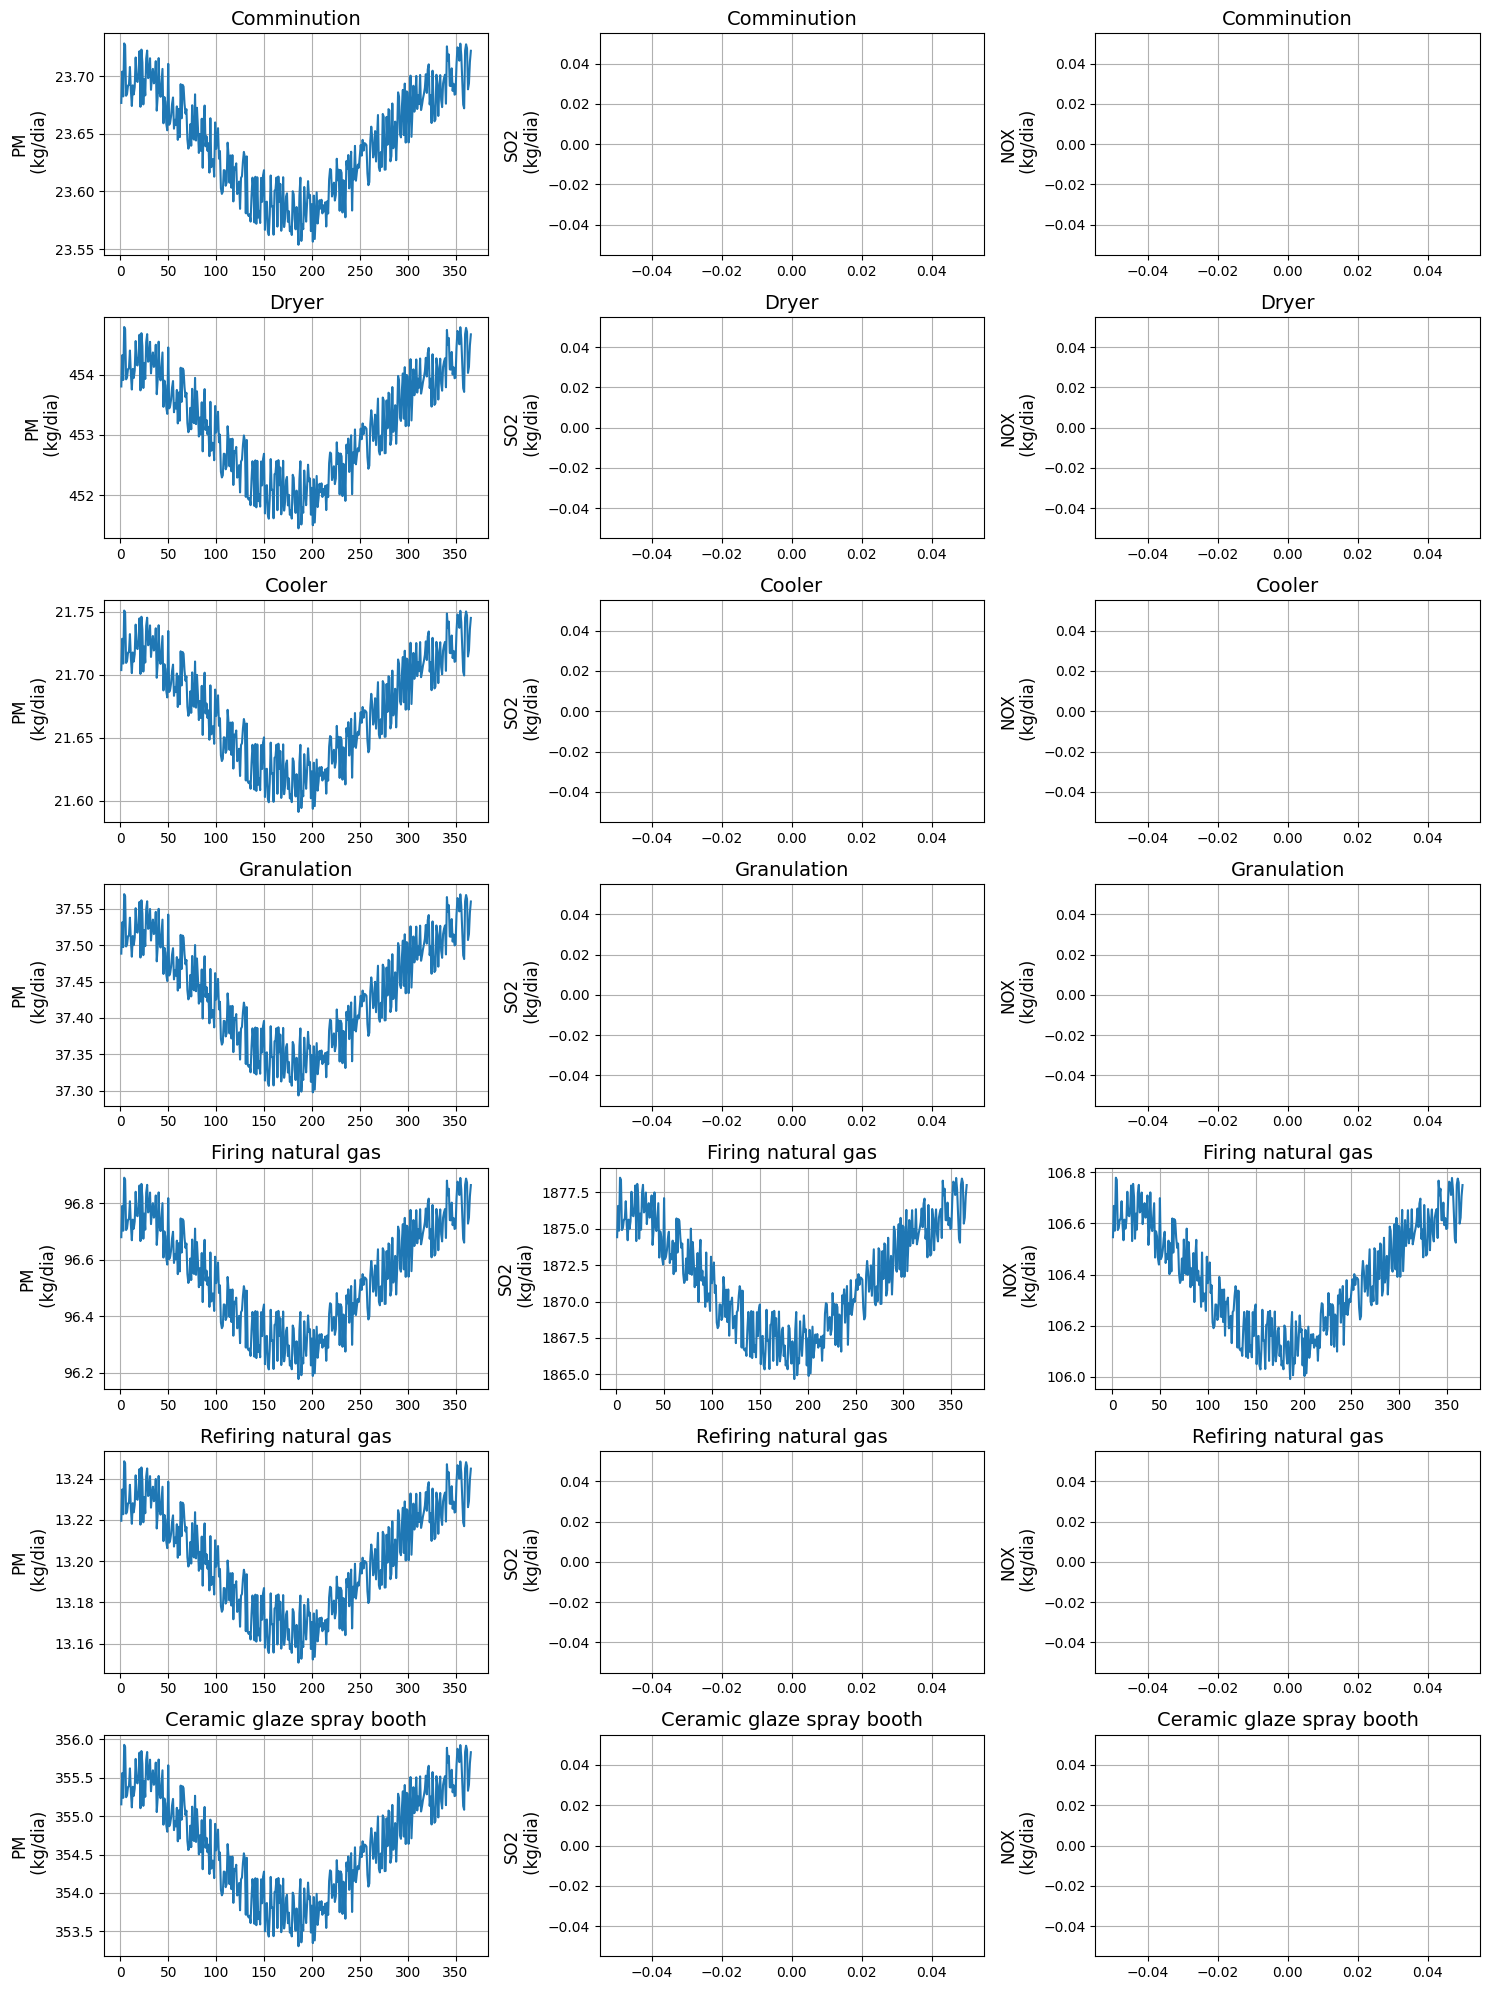

In [54]:
import matplotlib.pyplot as plt

# Definindo os processos e seus respectivos títulos
processos = [
    ('Comminution', 0),
    ('Dryer', 1),
    ('Cooler', 2),
    ('Granulation', 3),
    ('Firing natural gas', 4),
    ('Refiring natural gas', 5),
    ('Ceramic glaze spray booth', 6)
]

# Criando subplots para cada processo
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
for idx, (processo, idx_fe) in enumerate(processos):
    for ii in range(1, 4):
        ax = axs[idx, ii-1]
        ax.plot(df['Dia do Ano'], df['producao_diaria']*fe.iloc[idx_fe, ii])
        ax.set_ylabel(fe.columns[ii]+'\n (kg/dia)', fontsize=12)
        ax.set_title(processo, fontsize=14)  # Adicionando o título do processo em cada gráfico
        ax.grid(True)  # Adicionando linhas de grade
plt.tight_layout()
plt.show()

#OS GRÁFICOS QUE ESTÃO VAZIOS É PQ NÃO TEM FATOR DE EMISSÃO 

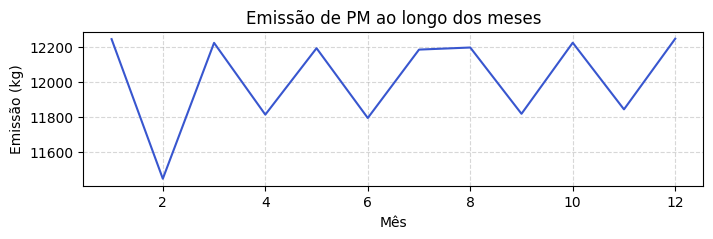

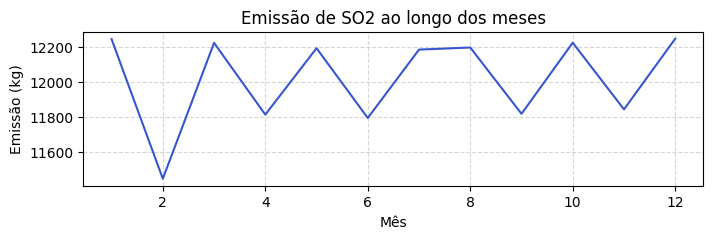

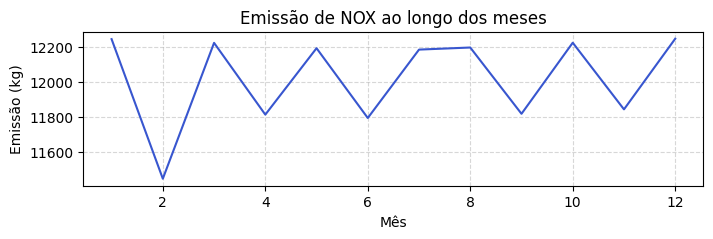

In [64]:
# Calcular a emissão mensal para cada poluente
emissoes_mensais = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_mensais[poluente] = df.groupby('Mes')['producao_diaria'].sum()
#print(emissoes_mensais)

# Plotar os gráficos de emissão para cada poluente
for poluente, emissao_mensal in emissoes_mensais.items():
    plt.figure(figsize=(8, 2))
    plt.plot(emissao_mensal.index, emissao_mensal.values, color='#3856CF')
    plt.title(f'Emissão de {poluente} ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()

    #MATHUES ESTE GRÁFICOS TBM ESTÃO ERRADOS, ELE ESTA CONSIDERANDO O MESMO VALOR PRA TODOS OS POLUENTES, TEM QUE FAZER COM QUE ELE CALCULE CERTO. LEVANDO EM CONSIDERAÇÃO UM POLUENTE POR GRÁFICO

### Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

In [65]:
# Calcular as emissões mensais para cada poluente
emissoes_mensais = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_mensais[poluente] = df.groupby('Mes')['producao_diaria'].sum()

# Calcular as emissões totais mensais em g/s para cada poluente
emissoes_totais_g_s = {}
for poluente, emissao_mensal in emissoes_mensais.items():
    emissoes_totais_g_s[poluente] = emissao_mensal * 1000 / (30 * 24 * 3600)  # Convertendo kg para g e dividindo pelo número de segundos em um mês

# Calcular as emissões totais para cada poluente considerando todos os processos
emissoes_totais = {}
for poluente in fe.columns[1:]:
    atv_processo = (atvMax - atvMin) * np.random.rand(len(fe)) + atvMin
    emissoes_totais[poluente] = fe[poluente] * atv_processo

# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente, emissao_total in emissoes_totais.items():
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibir os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados


#MATHEUS: AQUI ELE ESTA CALCULANDO OS POLUENTES ERRADO. SE VC OBSERVAR NO FINAL ESTA FICANDO TUDO IGUAL A MÉDIA, MÍNIMA E MÁXIMA, TEM QUE TENTAR RESOLVER ISSO E VER PQ ELE TA CALCULANDO ERRADO.

Resultados para o poluente 'PM':
Emissão Média (g/s): 142.4729541028021 
Emissão Mínima (g/s): 13.181776427151476 
Emissão Máxima (g/s): 451.74837333742386 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 1865.2136703753172 
Emissão Mínima (g/s): 1865.2136703753172 
Emissão Máxima (g/s): 1865.2136703753172 

Resultados para o poluente 'NOX':
Emissão Média (g/s): 106.1578651487524 
Emissão Mínima (g/s): 106.1578651487524 
Emissão Máxima (g/s): 106.1578651487524 



Referências
- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071 

In [ ]:
somar a varialibilidade a sazonalidade  e não multiplicar, eu tenho que colocar em variação diaária 